In [1]:
# importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

#Environment settings
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)

pd.set_option('display.float_format', lambda x: '%.4f' % x) 

# Step 1: Reading and Understanding the Data

In [2]:
# Reading the dataset

bike_df = pd.read_csv("day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.1108,18.1812,80.5833,10.7499,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.9026,17.6869,69.6087,16.6521,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.0509,9.4703,43.7273,16.6367,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.2000,10.6061,59.0435,10.7398,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.3052,11.4635,43.6957,12.5223,82,1518,1600


**Inspecting and Exploring the various aspects of the `bike_df` dataframe**

In [3]:
# Checking shape (Rows,Columns) of data

bike_df.shape

(730, 16)

In [4]:
# Check information about dataset

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#Checking statistical summary of numerical columns

bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000
mean,365.5000,2.4986,0.5000,6.5260,0.0288,2.9959,0.6904,1.3945,20.3193,23.7263,62.7652,12.7636,849.2493,3658.7575,4508.0068
std,210.8771,1.1102,0.5003,3.4502,0.1673,2.0003,0.4626,0.5448,7.5067,8.1503,14.2376,5.1958,686.4799,1559.7587,1936.0116
min,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,2.4243,3.9535,0.0000,1.5002,2.0000,20.0000,22.0000
25%,183.2500,2.0000,0.0000,4.0000,0.0000,1.0000,0.0000,1.0000,13.8119,16.8897,52.0000,9.0417,316.2500,2502.2500,3169.7500
50%,365.5000,3.0000,0.5000,7.0000,0.0000,3.0000,1.0000,1.0000,20.4658,24.3682,62.6250,12.1253,717.0000,3664.5000,4548.5000
75%,547.7500,3.0000,1.0000,10.0000,0.0000,5.0000,1.0000,2.0000,26.8806,30.4458,72.9896,15.6256,1096.5000,4783.2500,5966.0000
max,730.0000,4.0000,1.0000,12.0000,1.0000,6.0000,1.0000,3.0000,35.3283,42.0448,97.2500,34.0000,3410.0000,6946.0000,8714.0000


In [6]:
# checking missing values

bike_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Checking the data types of columns

bike_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Inferences

 - (730,16) rows & columns in the dataset.
 - No null values present in any of the columns.
 - Dtype is float or integers for all columns except ('dteday') which has object dtype
 - Some of the columns have numerical dtype but their meaning is categorical as per data dictionary, so further manipulation is needed for proper dtype-labelling

## 1.1 Data cleaning and maipulation

 **1. Dropping unnecessary columns**

- **`instant`** : As per data dictionary this feature provides record index.We can use pandas dataframe index for this which is by default
- **`dteday`**:This feature provides the date of record.There are two other features `mnth` and `yr` (Month and Year) which makes "dteday" information not useful (redundant).
- **`casual`** & **`registered`**:The ***`casual + registered`*** gives `cnt` which is total count of users so, we'll drop casual,registered as they will not be helpful as the same information is already present in `cnt` column.


In [8]:
# 1.Dropping unnecessary columns

print("Shape before dropping columns: ",bike_df.shape)
bike_df.drop(labels=["instant","dteday","casual","registered"],axis=1,inplace =True)
print("Shape after dropping columns: ",bike_df.shape)

Shape before dropping columns:  (730, 16)
Shape after dropping columns:  (730, 12)


In [9]:
# checking data after dropping
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.1108,18.1812,80.5833,10.7499,985
1,1,0,1,0,2,1,2,14.9026,17.6869,69.6087,16.6521,801
2,1,0,1,0,3,1,1,8.0509,9.4703,43.7273,16.6367,1349
3,1,0,1,0,4,1,1,8.2000,10.6061,59.0435,10.7398,1562
4,1,0,1,0,5,1,1,9.3052,11.4635,43.6957,12.5223,1600


**2. Mapping/Encoding the Categorical Variables**
- There are few columns which have numerical dtype but their meaning is categorical, so we will convert them to string values.
- Features like `season,mnth,weekday and weathersit` are integers but they need to be converted in categorical.

In [10]:
# changing columns to categorical string values and then changing their dtypes to categorical

# 1st 'season' column
bike_df["season"] = bike_df["season"].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}).astype("category")

# 2nd 'mnth' column 
mnth_dict= {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'}
bike_df["mnth"] = bike_df["mnth"].map(mnth_dict).astype("category")

#3rd 'weekday' column
bike_df['weekday']=bike_df["weekday"].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}).astype("category")

# 4th 'weathersit' column
bike_df['weathersit'] =bike_df['weathersit'].map({1:'Clear', 2:'Mist', 3:'Light', 4:'Heavy'}).astype("category")



mnth_dict= {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July",8: "August",9: "September",10: "October",11: "November",12: "December"}
{1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'}

In [11]:
# checking dtype after conversion

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [12]:
# checking dataframe after conversion

bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist,14.1108,18.1812,80.5833,10.7499,985
1,spring,0,Jan,0,Tue,1,Mist,14.9026,17.6869,69.6087,16.6521,801
2,spring,0,Jan,0,Wed,1,Clear,8.0509,9.4703,43.7273,16.6367,1349
3,spring,0,Jan,0,Thu,1,Clear,8.2000,10.6061,59.0435,10.7398,1562
4,spring,0,Jan,0,Fri,1,Clear,9.3052,11.4635,43.6957,12.5223,1600


In [13]:
# checking value counts in categorical column

def valuesCount(data,columnsList):
    for i in columnsList:
        count=data[i].value_counts()
        print("value_counts for :",i,"\n")
        print(count,"\n")
        print("___"*40,"\n")

valuesCount(bike_df,["season","mnth","weekday","weathersit"])

value_counts for : season 

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64 

________________________________________________________________________________________________________________________ 

value_counts for : mnth 

Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: mnth, dtype: int64 

________________________________________________________________________________________________________________________ 

value_counts for : weekday 

Mon    105
Tue    105
Fri    104
Sat    104
Sun    104
Thu    104
Wed    104
Name: weekday, dtype: int64 

________________________________________________________________________________________________________________________ 

value_counts for : weathersit 

Clear    463
Mist     246
Light     21
Name: weathersit, dtype: int64 

_____________________________________________________________________________________________

In [14]:
# Checking number of unique values in all columns

bike_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

# Step 2: Visualising the Data


### Visualising the numeric variables


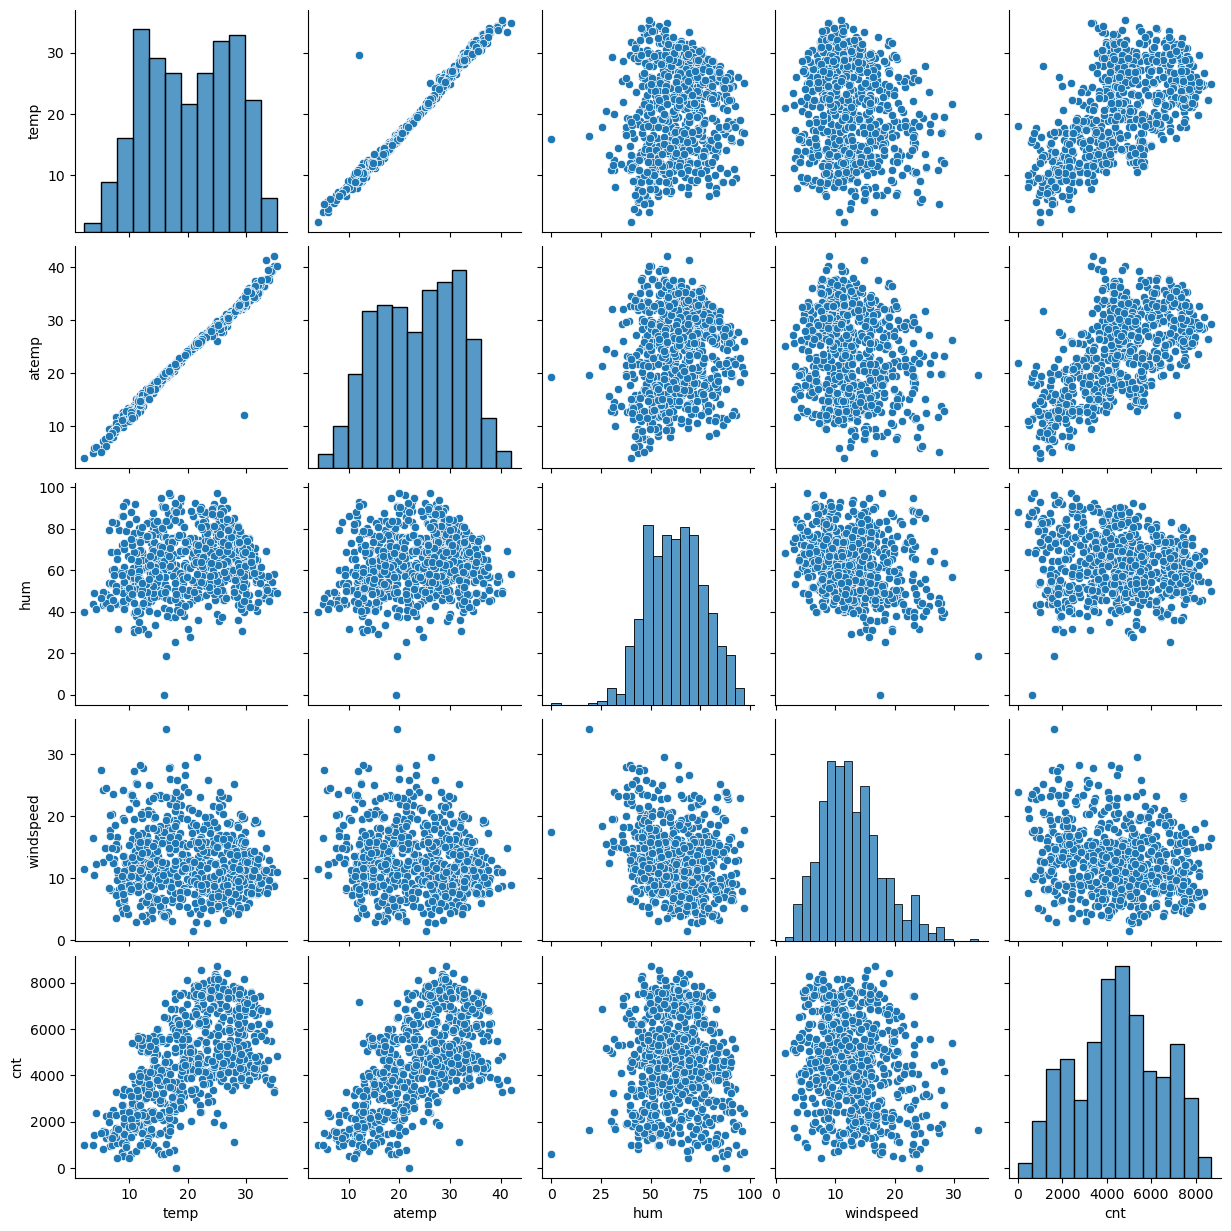

In [15]:
# Visualising the numeric variables using scatterplot

num_cols=['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(bike_df[num_cols])
plt.show()

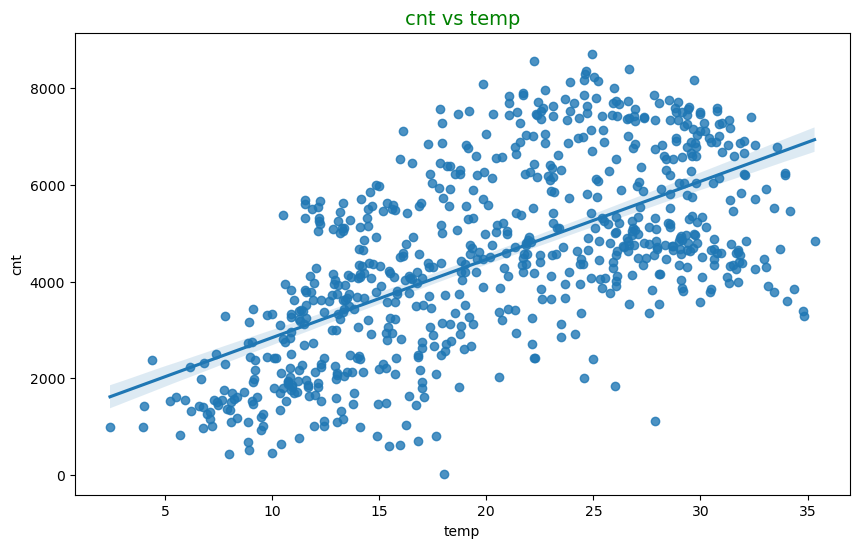

In [16]:
plt.figure(figsize=[10,6])
plt.title("cnt vs temp",fontdict={'fontsize': 14, 'fontweight' : 12, 'color' : 'Green'})
sns.regplot(x="temp",y="cnt",data=bike_df)
plt.show()

#### Inferences:
- `atemp (feeling temperature)` and `temp (temperature)` shows very high positve correlation with each other
- `atemp` and `temp` shows a positive correlation with **`cnt`** which is our Target variable
- `hum` and `windspeed` not showing much correlation with `cnt` as their points are scattered.

### Visualizing the categorical variables

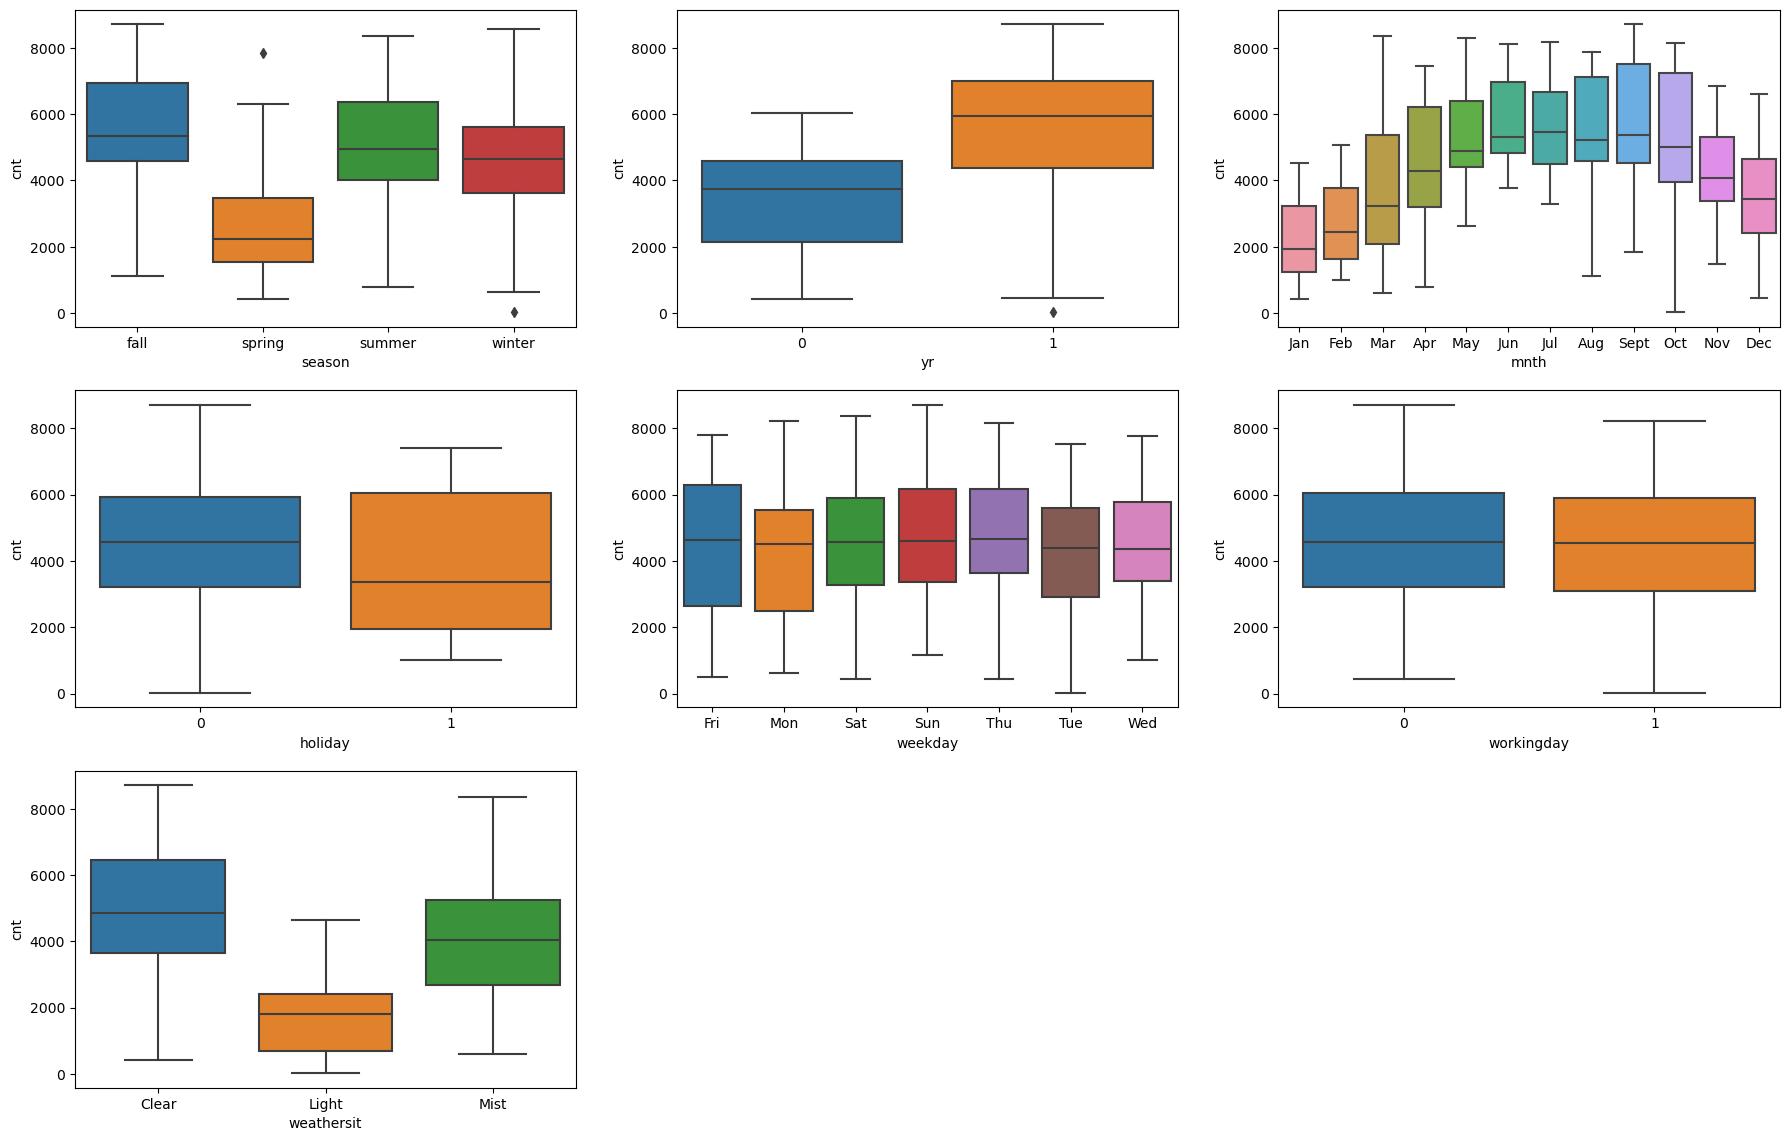

In [17]:
# Visualising the categorical variables using boxplot

cat_cols=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit']
month_names=list(mnth_dict.values())

plt.figure(figsize=[22,14])
for i,j in enumerate(cat_cols):
    if j=="mnth":
        plt.subplot(3,3,i+1)
        sns.boxplot(x=j,y="cnt",data=bike_df,order=month_names)
    else:
        plt.subplot(3,3,i+1)
        sns.boxplot(x=j,y="cnt",data=bike_df)
    
plt.show()
    

#### Inferences:
- Fall and Summer season shows more count of bikes rented.
- Users rented more bikes in 2019.
- The demand for bikes started increasing from the month of March,Demands saw its peak in months of `(June to October)` and then demand started decreasing in months of November and December.
- In holidays the demand is less as compare to no holidays.
- Weekday shows similar results for all days.
- Working or Non-Working days shows similar behaviour.
- Count of Rented bikes is `higher` on `(Clear, Few clouds, Partly cloudy, Partly cloudy)` and followed by `(Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)` weather. No record for Heavy weathers

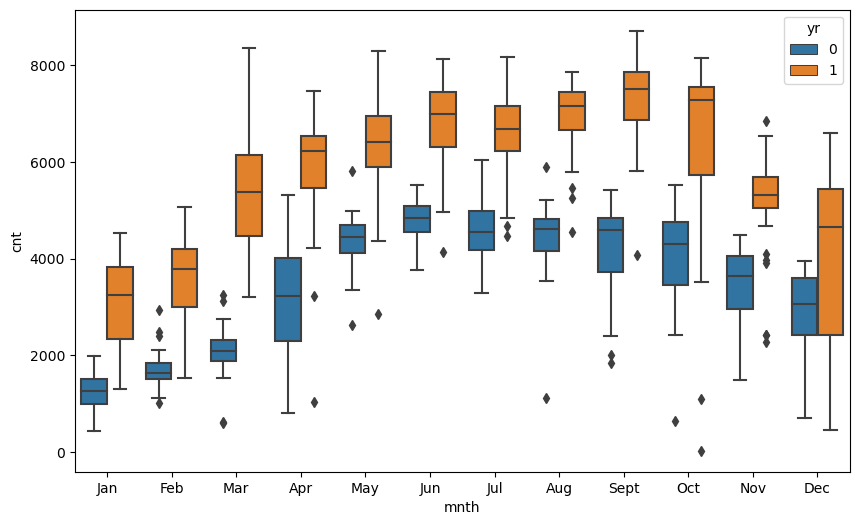

In [18]:
# lets see how the cnt variable behaves monthwise for both the year.

month_names=list(mnth_dict.values())

# (0 : 2018 , 1 : 2019)

plt.figure(figsize=(10,6))
sns.boxplot(x='mnth',y="cnt",data=bike_df,hue='yr',order=month_names)
plt.show()

### Checking correlation among variables

In [19]:
# correlation dataframe

corr =bike_df.corr()
corr

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.0000,0.0082,-0.0119,0.0488,0.0472,-0.1125,-0.0116,0.5697
holiday,0.0082,1.0000,-0.2570,-0.0288,-0.0327,-0.0157,0.0063,-0.0688
workingday,-0.0119,-0.2570,1.0000,0.0020,0.0107,0.0538,-0.0025,-0.0276
temp,0.0488,-0.0288,0.0020,1.0000,0.9917,0.1286,-0.1582,0.6270
atemp,0.0472,-0.0327,0.0107,0.9917,1.0000,0.1415,-0.1839,0.6307
hum,-0.1125,-0.0157,0.0538,0.1286,0.1415,1.0000,-0.2485,-0.0985
windspeed,-0.0116,0.0063,-0.0025,-0.1582,-0.1839,-0.2485,1.0000,-0.2351
cnt,0.5697,-0.0688,-0.0276,0.6270,0.6307,-0.0985,-0.2351,1.0000


### Visualizing the correlation dataframe using Heatmap

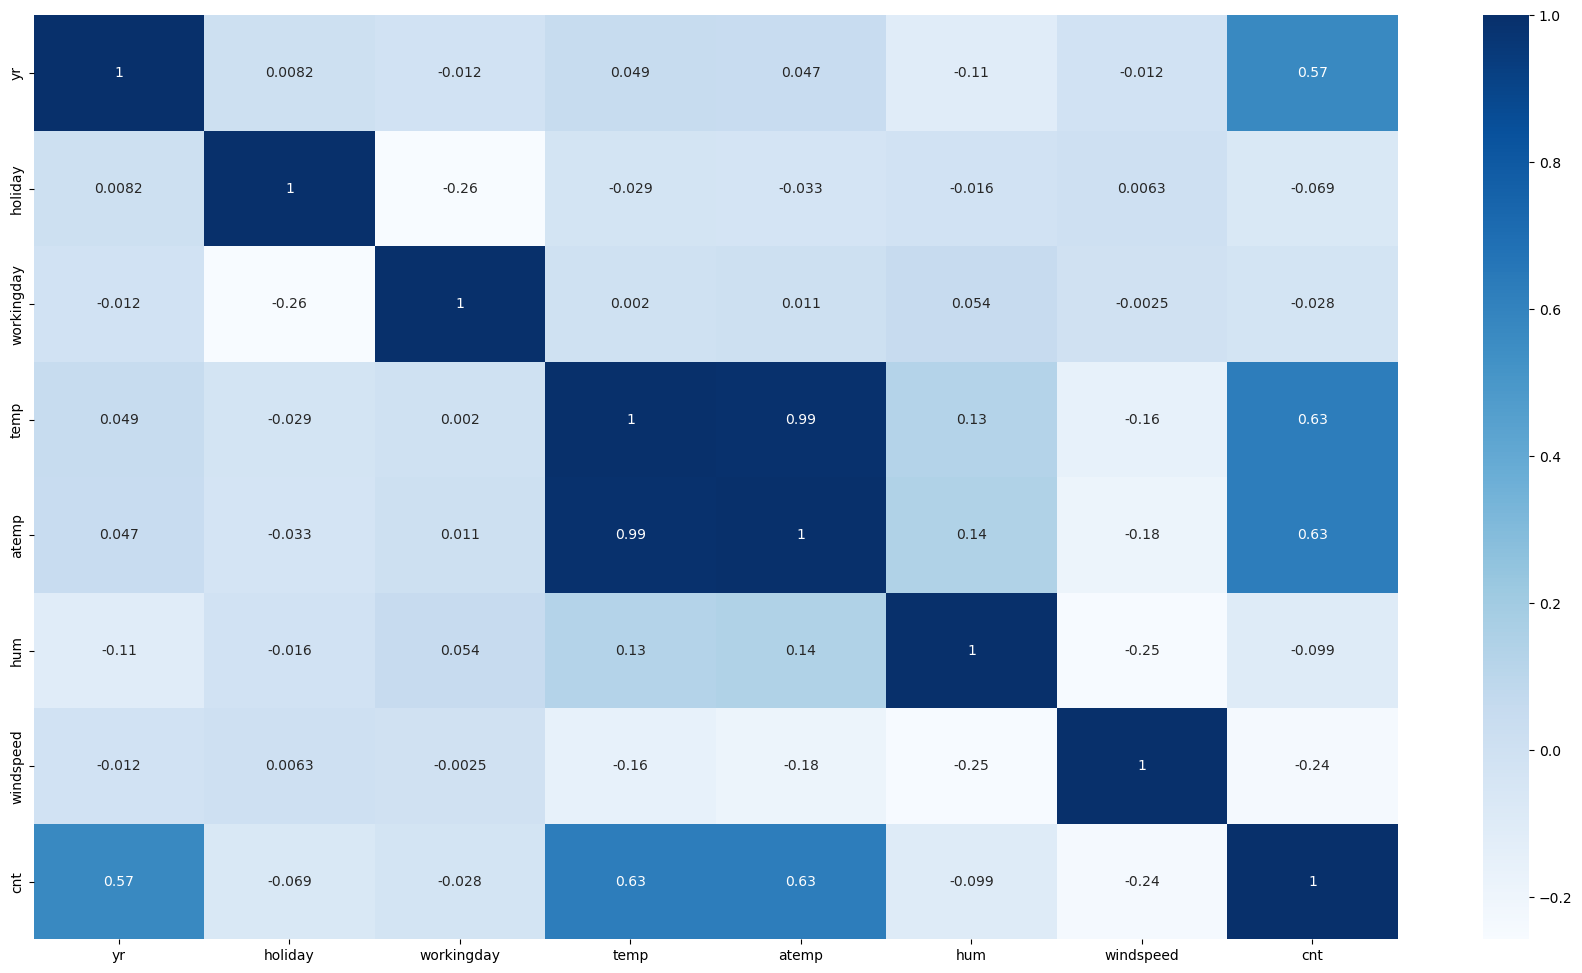

In [20]:
# making heatmap plot 

plt.figure(figsize=(22,12))
sns.heatmap(corr , annot= True , cmap = "Blues")
plt.show()

#### Inferences:
- `atemp (feeling temperature) and temp (temperature)` have very high correlation with each other (0.99).
- Both `atemp and temp` shows positive correlation with the `target variable` `cnt`.
- Both above points concludes that one of the atemp or temp can be dropped as both are similar (0.99 correlation coefficient) and shows similar trend with `cnt` variable,lets decide dropping in model building part
- Target variable `cnt` has very low correlation coefficient with humudity,holiday and workingday

# Step 3: Data Prepration

- We can see that our dataset has many columns with categorical string values.

- But in order to fit a regression line, we would need numerical values and not string values. Hence, 
    - we'll be creating and adding dummy variables to the bike_df dataframe
    - We'll drop columns for which we created dummy variables

### Dummy Variables

In [21]:
# List of variables for creating dummy variables
dummy = ["season","mnth","weekday","weathersit"]

# Creat Dummy variables
dummy_bike_df = pd.get_dummies(bike_df[dummy],drop_first=True)

In [22]:
# inspectng the dummy dataframe
dummy_bike_df.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
# Adding dummy variables dataframe to the bike_df dataframe

bike_df = pd.concat([bike_df,dummy_bike_df],axis=1)

In [24]:
# Dropping columns for which we created dummy variables
bike_df.drop(dummy,axis=1,inplace=True)

In [25]:
# Checking the dataframe after adding dummy variables and dropping dummy columns

bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
0,0,0,1,14.1108,18.1812,80.5833,10.7499,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.9026,17.6869,69.6087,16.6521,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.0509,9.4703,43.7273,16.6367,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.2000,10.6061,59.0435,10.7398,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.3052,11.4635,43.6957,12.5223,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
bike_df.shape

(730, 30)

# Step 4: Splitting the Data into Training and Testing Sets

In [27]:
#The first basic step for regresssion is performing a train-test split

# Train set = 70% ,Test set = 30%
train_df, test_df = train_test_split(bike_df,train_size = 0.7,random_state = 100)


In [28]:
# Checking shape of train and test dataset

print("Train set shape",train_df.shape)
print("Test set shape",test_df.shape)

Train set shape (510, 30)
Test set shape (220, 30)


# Step 5: Scaling the features
- It is extremely important to scale the numerical variables so that they have a comparable scale
-`Normalising` to scale numerical variables

In [29]:
# Scaling the training dataset

# Instantiate an object
scaler = MinMaxScaler()

In [30]:
# Apply scaler() to all the columns which are continuous variables, except the 'yes-no'(0-1) and 'dummy' variables

# Create a list of numeric vars
num_vars = ['temp','hum','windspeed','cnt']

# Fit on data
train_df[num_vars] = scaler.fit_transform(train_df[num_vars])

In [31]:
# checking train dataset after scaling (normalisation)
train_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
576,1,0,1,0.8152,33.1448,0.7256,0.2647,0.8277,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.4424,20.6746,0.6402,0.2553,0.4653,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.2451,11.5850,0.4981,0.6631,0.2041,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.3957,18.8752,0.5045,0.1885,0.4830,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.3458,16.0977,0.7518,0.3810,0.1911,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [32]:
# Checking the statistical summary of train data

train_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
count,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000
mean,0.5078,0.0255,0.7118,0.5374,23.5003,0.6505,0.3209,0.5135,0.2431,0.2471,0.2471,0.0961,0.0843,0.0667,0.0882,0.0765,0.0765,0.0980,0.0843,0.0863,0.0843,0.0804,0.1549,0.1294,0.1373,0.1431,0.1529,0.1353,0.0294,0.3451
std,0.5004,0.1578,0.4534,0.2259,8.0910,0.1458,0.1698,0.2244,0.4294,0.4317,0.4317,0.2950,0.2781,0.2497,0.2839,0.2660,0.2660,0.2977,0.2781,0.2810,0.2781,0.2722,0.3622,0.3360,0.3445,0.3506,0.3603,0.3424,0.1691,0.4759
min,0.0000,0.0000,0.0000,0.0000,3.9535,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.3399,16.6031,0.5386,0.1992,0.3564,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,1.0000,0.0000,1.0000,0.5426,24.1311,0.6537,0.2968,0.5186,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,1.0000,0.0000,1.0000,0.7352,30.1777,0.7548,0.4144,0.6847,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
max,1.0000,1.0000,1.0000,1.0000,42.0448,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


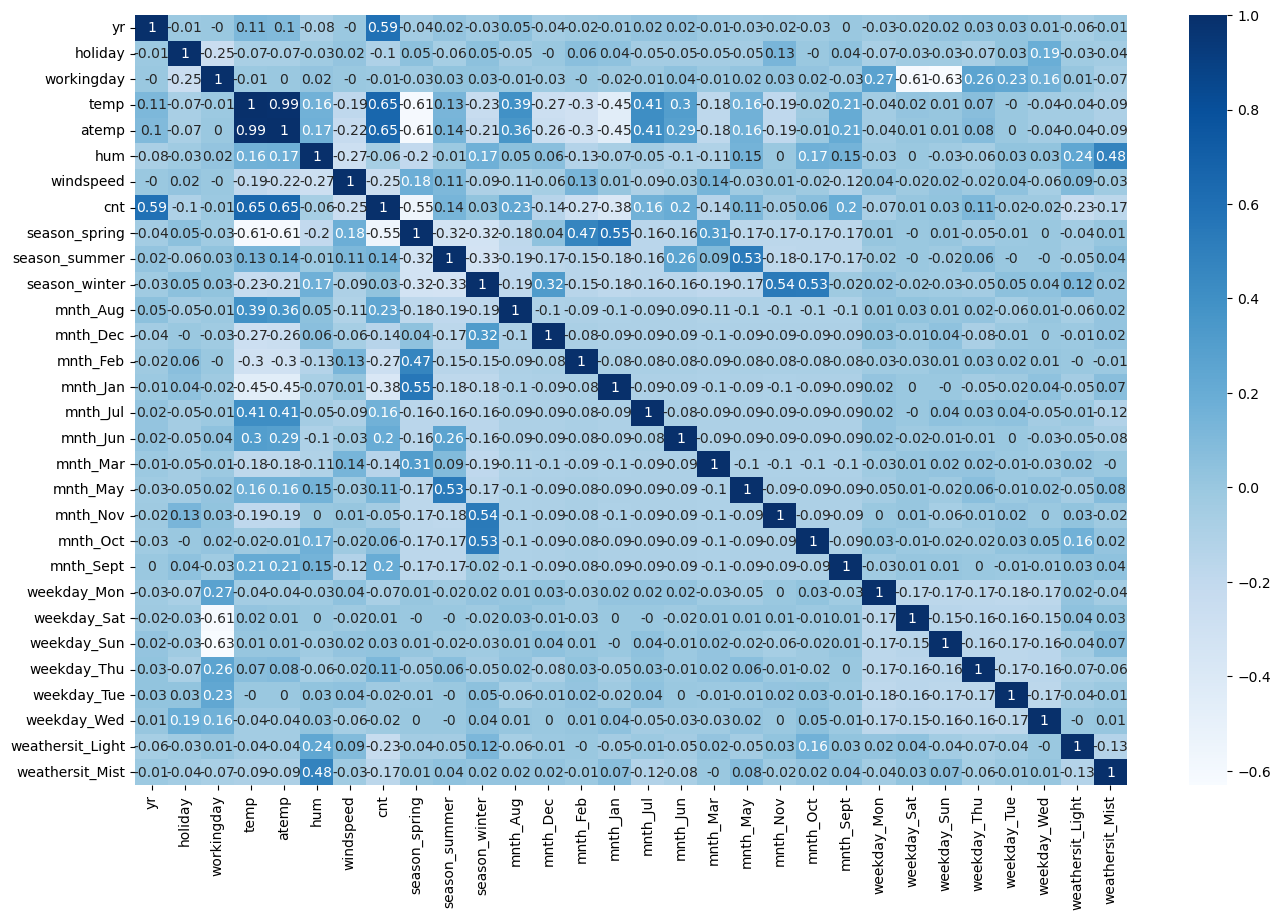

In [33]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(round(train_df.corr(),2), annot = True, cmap="Blues")
plt.show()

#### Inferences:
- `cnt` have good +ve correlation coefficient with `temp`,`atemp`,and `yr`
- `mnth_Jan has positive correlation with season_spring (0.55)`
- `mnth_Nov , mnth_Oct has similar positive correlation with season_winter (0.54)`, these variables needed to be checked at time of model building these might create multicollinearity.

### Dividing into X and Y sets for the model building

In [34]:
y_train = train_df.pop("cnt")
X_train = train_df

In [35]:
# checking y variable

print(y_train.shape)
y_train.head()

(510,)


576   0.8277
426   0.4653
728   0.2041
482   0.4830
111   0.1911
Name: cnt, dtype: float64

In [36]:
# checking X variable

print(X_train.shape)
X_train.head()

(510, 29)


,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
576,1,0,1,0.8152,33.1448,0.7256,0.2647,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.4424,20.6746,0.6402,0.2553,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.2451,11.5850,0.4981,0.6631,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.3957,18.8752,0.5045,0.1885,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.3458,16.0977,0.7518,0.3810,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


# Step 6: Linear Model Building
- Using statsmodels we will fit a regression line through the training dataset
- In statsmodels, we need to add a constant using `sm.add_constant(X)`,if we dont do this step,the fit regression line will pass through origin by default everytime in statsmodels
- We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)
- Using `RFE` (Recursive feature elimination) and then Manual tunning to improve the model.

- We are using RFE method because it will provide us set of selected variables which are sorted (ranked) in order of importance which can impact our Target variable. This is done automatically in RFE, also it is very hectic to analyse so many Predictors (in this assignment we have 30 of them).So we are using Mixed approach using RFE and and Manual Feature Elimination based on their statistical features.

In [37]:
# Using the LinearRegression function from SciKit Learn

lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE for choosing top 15 features by automated approach
rfe = RFE(lm, n_features_to_select=15)        
rfe = rfe.fit(X_train, y_train)

In [38]:
# Columns selected by RFE
l1=sorted(list(zip(X_train.columns,rfe.support_,rfe.ranking_)),key=lambda i:i[2])
l1

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Sept', True, 1),
 ('weathersit_Light', True, 1),
 ('weathersit_Mist', True, 1),
 ('mnth_Feb', False, 2),
 ('workingday', False, 3),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 5),
 ('weekday_Tue', False, 6),
 ('weekday_Mon', False, 7),
 ('mnth_May', False, 8),
 ('mnth_Aug', False, 9),
 ('weekday_Wed', False, 10),
 ('mnth_Jun', False, 11),
 ('mnth_Oct', False, 12),
 ('weekday_Thu', False, 13),
 ('atemp', False, 14),
 ('mnth_Mar', False, 15)]

In above List where `rfe.support_ is True` and `rfe.ranking_ is 1` those columns are `selected by rfe` and we will use these columns for our 1st model and then use the manual tunning (elimination approach) for improving the model further. We will drop columns which has p-values > 0.05 and VIF > 10 in the model summary.

In [39]:
# column names which are selected by rfe (where ref.support_ is True)
rfe_col=X_train.columns[rfe.support_]
rfe_col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sept', 'weathersit_Light', 'weathersit_Mist'],
      dtype='object')

In [40]:
# column names which are not selected by rfe
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [41]:
# User defined function for calculating VIFs for variables
def calculate_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

### Model 1

In [42]:
# Building model using statsmodels, for the detailed statistics

# columns selected by RFE to be used for this model 
rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
lr_1 = sm.OLS(y_train,X_train_sm1).fit()  

lr_1.params

const               0.3197
yr                  0.2304
holiday            -0.0911
temp                0.4815
hum                -0.1622
windspeed          -0.1887
season_spring      -0.0613
season_summer       0.0423
season_winter       0.1019
mnth_Dec           -0.0355
mnth_Jan           -0.0434
mnth_Jul           -0.0553
mnth_Nov           -0.0387
mnth_Sept           0.0755
weathersit_Light   -0.2465
weathersit_Mist    -0.0543
dtype: float64

In [43]:
#Let's see the summary of our linear model

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          8.15e-189
Time:                        21:43:34   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3197      0.036  

#### Inferences:
- For Model 1 (lr_1) the `R-squared:0.845` & `Adj. R-squared:0.840` which is very good for a model
- Also the p-values for all independent variables is less than 0.05 which makes them significant
- Now lets check VIFs for these variables to check if there is any multicollinearity which exists among the independent variables

In [44]:
# Calculate the VIFs for lr_1 model, using user-defined function

calculate_vif(X_train_rfe)

,Features,VIF
0,hum,30.8900
1,temp,17.7900
2,windspeed,4.7200
3,season_spring,4.3700
4,season_winter,4.0600
5,season_summer,2.8200
6,weathersit_Mist,2.3200
7,yr,2.0900
8,mnth_Nov,1.8500
9,mnth_Jan,1.7500


#### Inferences:
- `hum` VIF = 30 and this is very high, this indicates that `hum` variable is multicollinear with the other independent variables.This feature needs to be dropped to remove Multicollinearity
- Also in `lr_1` model the p-value of `mnth_Dec` is also very close to 0.05 so that is also needs to be checked.


### Model 2

In [45]:
# Dropping 'hum' column
rfe_col=rfe_col.drop("hum")

In [46]:
# Creating X_train dataframe with variables in rfe_col
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr_2 = sm.OLS(y_train,X_train_sm2).fit()

# Check the summary
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          4.75e-186
Time:                        21:43:34   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2450      0.032  

#### Inferences:
- After dropping `hum` and building model 2 (lr_2) we have `R-squared: 0.839` & `Adj. R-squared: 0.835` which is again quite good for a model.
- Also the p-values for all independent variables is less than 0.05 which makes them significant (only mnth_Nov = 0.04 as p-value which is close to 0.05 but its in safe range)
- Now lets check VIFs for these variables to check if there is any multicollinearity which exists among the independent variables

In [47]:
# Calculate the VIFs for lr_2 model, using user-defined function

calculate_vif(X_train_rfe)

,Features,VIF
0,temp,5.1700
1,windspeed,4.6700
2,season_winter,2.9500
3,season_spring,2.8900
4,season_summer,2.2400
5,yr,2.0700
6,mnth_Nov,1.8100
7,mnth_Jan,1.6600
8,mnth_Jul,1.5900
9,weathersit_Mist,1.5700


#### Inferences:
- All the variables has VIF < 5 which accept temp = 5.17 which is close to 5, While EDA we saw that temp has high correlation with `cnt` (0.65) which makes `temp` important, thus as per our buisness understanding we will keep `temp` in our model even if its vif > 5 but at the same time its very near to 5, we drop variables with vif > 10
- **p-values for all variables is less than 0.05**
- This model looks acceptable as everything is under control (p-values & VIFs)

# Step 7: Residual Analysis of the train data

We will validate the Assumptions of Linear Regression in this step
- Normal Distribution of error terms
- Independence of error terms
- Homoscedasticity (variance of residual, or error term is constant)
- Multicollinearity

In [48]:
y_train_pred = lr_2.predict(X_train_sm2)

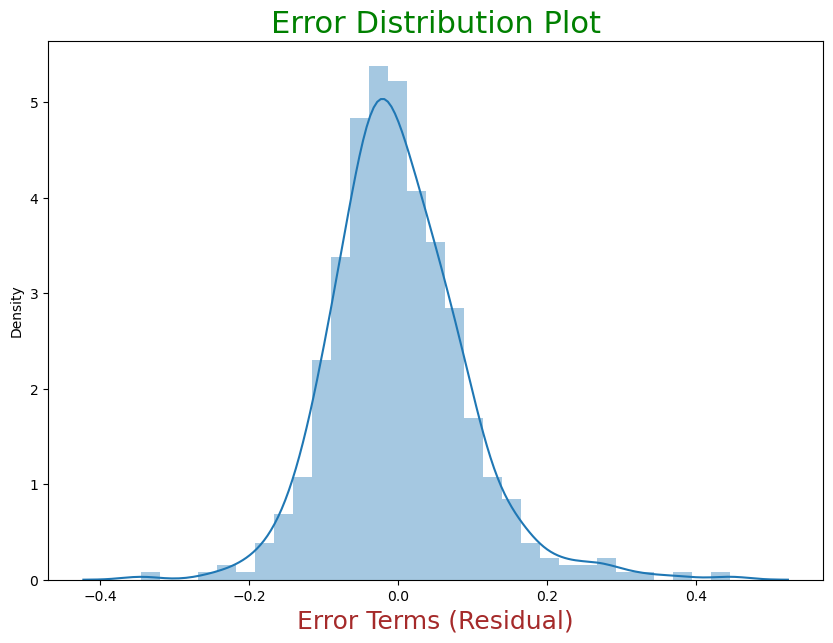

In [49]:
# Checking Normal Distribution of error terms (or residuals)

res = y_train_pred - y_train 
plt.figure(figsize=(10,7))
sns.distplot(res)
plt.title('Error Distribution Plot', fontdict={'fontsize': 22,'color' : 'Green'})
plt.xlabel('Error Terms (Residual)', fontdict={'fontsize': 18,'color' : 'Brown'})
plt.show()

#### Inferences:
- The residuals are normally distributed around 0 in our distribution plot, hence our model passes assumption that error terms are normally distributed. 

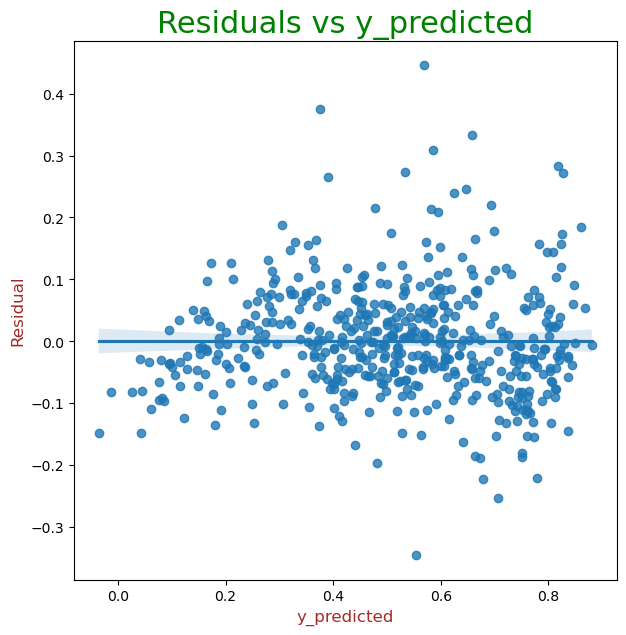

In [50]:
# Checking Independence of error terms

plt.figure(figsize=(7,7))
plt.title("Residuals vs y_predicted",fontdict={'fontsize': 22,'color' : 'Green'})
sns.regplot(x=y_train_pred, y=res)
plt.xlabel("y_predicted",fontdict={'fontsize': 12,'color' : 'Brown'})
plt.ylabel("Residual",fontdict={'fontsize': 12,'color' : 'Brown'})
plt.show()


#### Inferences:
- In above plot we can't see any relation between y_predicted and Residuals (no patterns observed), Hence the Error terms are independent.


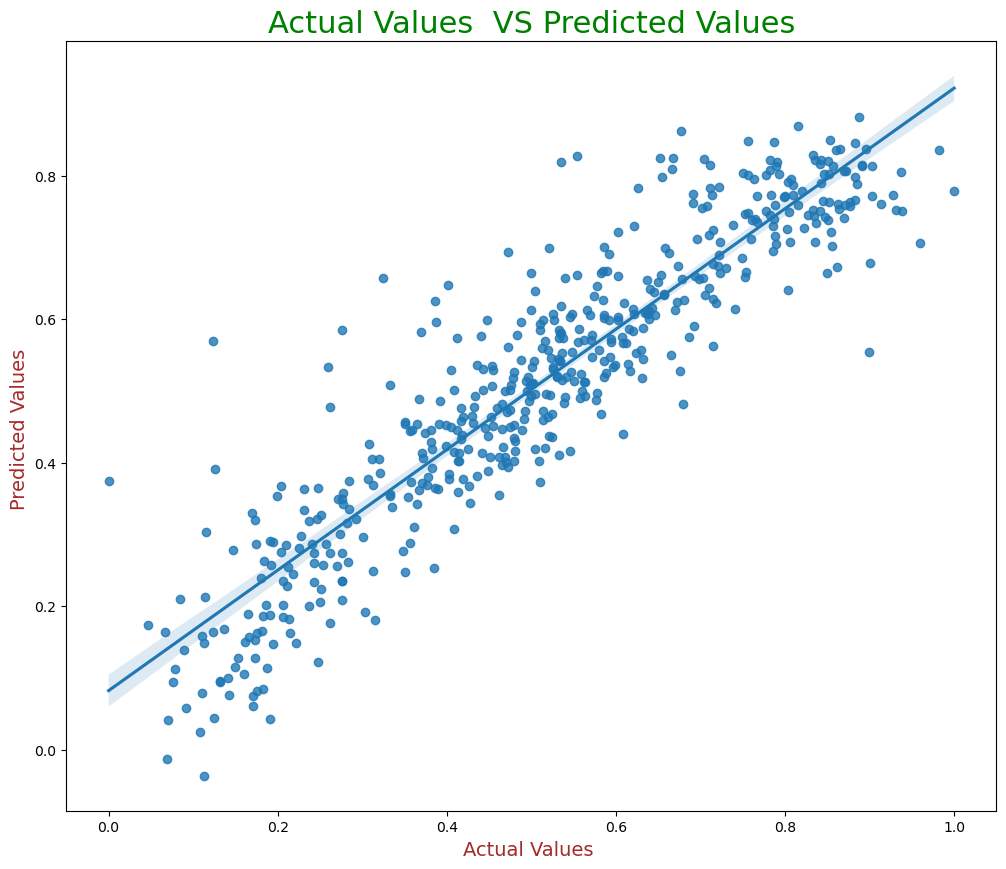

In [51]:
# Checking Homoscedasticity (variance of residual, or error term is constant)

plt.figure(figsize=(12,10))

plt.title('Actual Values  VS Predicted Values' , fontdict={'fontsize': 22, 'color' : 'Green'})
sns.regplot(x=y_train, y=y_train_pred)

plt.xlabel('Actual Values ', fontdict={'fontsize': 14,'color':"Brown"})
plt.ylabel('Predicted Values ', fontdict={'fontsize': 14,'color':"Brown"})
plt.show()

#### Inferences:
- In the above plot the variance is almost constant, we can say that the error terms are equally distributed,Hence our model follows Homoscedasticity.
- **As our Model 2 passes all the assumptions ,now we can use it for making predictions as our final model**

### Multicollinearity
- We checked  while building the model when we checked VIFs of all the variables selected by RFE. All the VIF are in controlled range and good to go.

In [52]:
# Calculate the VIFs for lr_2 model, using user-defined function

calculate_vif(X_train_rfe)

,Features,VIF
0,temp,5.1700
1,windspeed,4.6700
2,season_winter,2.9500
3,season_spring,2.8900
4,season_summer,2.2400
5,yr,2.0700
6,mnth_Nov,1.8100
7,mnth_Jan,1.6600
8,mnth_Jul,1.5900
9,weathersit_Mist,1.5700


# Step 8: Making Predictions on Test Dataset
- Now that we have fitted the model and checked assumptions (the normality of error terms, etc), it's time to go ahead and make predictions using the final, i.e.second model.

#### Applying the scaling on the test sets

In [53]:
# Apply scaler() to all the columns which are continuous variables

# Create a list of numeric vars
num_vars = ['temp','hum','windspeed','cnt']

test_df[num_vars] = scaler.transform(test_df[num_vars])

In [54]:
test_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
count,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000
mean,0.4818,0.0364,0.6409,0.5587,24.2503,0.6382,0.3133,0.5222,0.2545,0.2636,0.2364,0.0591,0.0864,0.1000,0.0773,0.1045,0.0955,0.0545,0.0864,0.0727,0.0864,0.0864,0.1182,0.1727,0.1545,0.1409,0.1227,0.1591,0.0273,0.3182
std,0.5008,0.1876,0.4808,0.2332,8.2811,0.1487,0.1596,0.2192,0.4366,0.4416,0.4258,0.2363,0.2815,0.3007,0.2676,0.3067,0.2945,0.2276,0.2815,0.2603,0.2815,0.2815,0.3236,0.3789,0.3623,0.3487,0.3289,0.3666,0.1632,0.4668
min,0.0000,0.0000,0.0000,0.0466,4.9420,0.2619,-0.0428,0.0482,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.3554,17.0900,0.5292,0.1988,0.3786,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.0000,0.0000,1.0000,0.5582,24.7000,0.6256,0.3001,0.5247,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,1.0000,0.0000,1.0000,0.7560,31.1243,0.7438,0.4027,0.6777,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
max,1.0000,1.0000,1.0000,0.9844,41.3186,1.0021,0.8075,0.9633,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [55]:
# Dividing into X_test and y_test

y_test = test_df.pop('cnt')
X_test = test_df


In [56]:
# Taking columns which are in our final model only

X_test_new = X_test[X_train_rfe.columns]

# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test_new)



In [57]:
# Making predictions using the final model
y_test_pred = lr_2.predict(X_test_sm)

#### Checking R-squared for Test set

In [58]:
# Calculating R-Squared for test set

test_r2=r2_score(y_test, y_test_pred)
test_r2

0.8136761325817871

The `Test R-squared (0.8136)` is close to the `Train R-squared (0.839)` in lr_2 model. So we can say that what the model has learnt on the training set.It is also able to generalize very well on the test set as well.


# Step 9: Model Evaluation
 
 - Let's now plot the graph for actual versus predicted values.

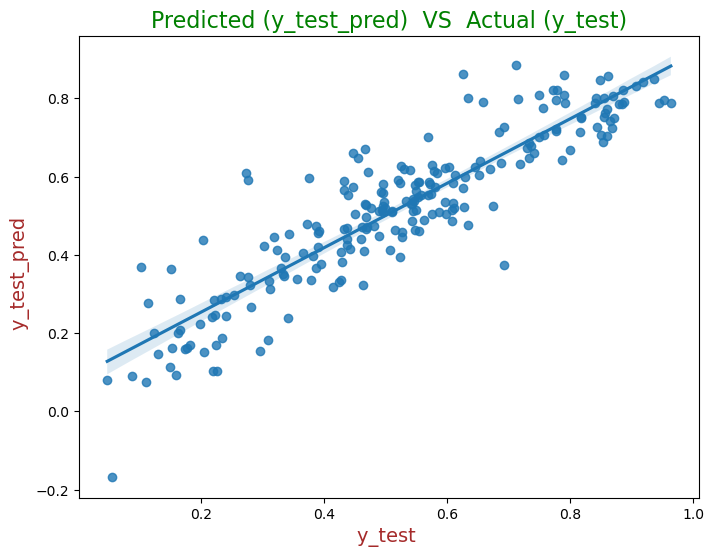

In [59]:
# Plotting scatterplot between y_test and y_test_pred to understand the spread

plt.figure(figsize=(8,6))

plt.title('Predicted (y_test_pred)  VS  Actual (y_test)' , fontdict={'fontsize': 16, 'color' : 'Green'})
sns.regplot(x=y_test, y=y_test_pred)
plt.xlabel('y_test ', fontdict={'fontsize': 14,'color':"Brown"})
plt.ylabel('y_test_pred  ', fontdict={'fontsize': 14,'color':"Brown"})
plt.show()

#### Inferences:
- In the above regplot there is a Linear Relationship between Actual & Predicted values

### Calculating the R-squared score on the test set .

In [60]:
from sklearn.metrics import r2_score

# r2_score for test
r2_score(y_test, y_test_pred)

0.8136761325817871

In [61]:
# r2_score for train and test

print("Train R^2: ",r2_score(y_train, y_train_pred))
print("Test R^2: ",r2_score(y_test, y_test_pred))


Train R^2:  0.8391472034949233
Test R^2:  0.8136761325817871


In [62]:
# calculating Adjusted R-Squared using formula
N = (1-r2_score(y_test, y_test_pred))*(X_test.shape[0]-1)
D = (X_test.shape[0] - X_test.shape[1] - 1 )

# using formula for adjusted R-Squared
Adj_r2_test = 1 - N/D

#Train Adj. R-Squared from lr_2 model summary
print("Train Adj. R-Squared : ",0.835)

#Test Adj. R-Squared from formula
print("Test Adj. R-Squared : ",round(Adj_r2_test,3))

Train Adj. R-Squared :  0.835
Test Adj. R-Squared :  0.785


**The r2_score difference is within 5% between train and test set, which is pretty good indicating the stability in the sense that the model has learned on the training side**

### Lets find the Equation of our Best fitted Line from our final Model-2

In [63]:
parameters=lr_2.params.sort_values(ascending=False)
parameters

temp                0.4387
const               0.2450
yr                  0.2345
season_winter       0.0869
mnth_Sept           0.0687
season_summer       0.0349
mnth_Nov           -0.0395
mnth_Dec           -0.0428
mnth_Jan           -0.0500
mnth_Jul           -0.0500
season_spring      -0.0713
weathersit_Mist    -0.0801
holiday            -0.0918
windspeed          -0.1585
weathersit_Light   -0.2917
dtype: float64

#### These are the Features which are significant in predicting the count of rented bikes
- The sign coefficients of these features indicates that the count of rented bike will increase or decrease
 - Positive sign indicates that with increase in these values will result in increase in value of rented bikes (cnt). temp,yr ,etc have +ve sign of coefficients
 - Negative sign indicates that with increase in these values will result in decrease in value of rented bikes (cnt).

In [64]:
# Creating a dataframe of parameters for better reading
Equation_data =pd.DataFrame(parameters)
Equation_data.reset_index(inplace= True)
Equation_data.rename(columns={"index":"Features",0:"Coefficients"},inplace=True)
Equation_data

,Features,Coefficients
0,temp,0.4387
1,const,0.2450
2,yr,0.2345
3,season_winter,0.0869
4,mnth_Sept,0.0687
5,season_summer,0.0349
6,mnth_Nov,-0.0395
7,mnth_Dec,-0.0428
8,mnth_Jan,-0.0500
9,mnth_Jul,-0.0500


#### Equation of best fitted line (came from summary of lr_2 model) is :
<hr>

**cnt = 0.2450 + 0.4387 X temp + 0.2345 X yr + 0.0869 X season_winter + 0.0687 X mnth_Sept + 0.0349 X season_summer 
     - 0.0395 X mnth_Nov - 0.0428 X mnth_Dec - 0.0500 X mnth_Jan - 0.0500 X mnth_Jul - 0.0713 x season_spring
     - 0.0801 X weathersit_Mist - 0.0918 X holiday - 0.1585 X windspeed - 0.2917 X weathersit_Light** 

<hr>

*Value of constant (intercept) is 0.245*

## Summary and Conclusions

- **`temp`** : As we can see in the best fitted line equation `temp` is the most significant and important feature in predicting count of rented bikes.
 - Unit increase in temp and all other independent features are kept constant the Count of rented bike (users) `cnt` increases by 0.4387 units
- The count of bikes rented is highly affected by temp,season and month of the year.
- The count of rented bikes is increasing as the year is increasing.
- On windy days the bike rental count decreases.
- Fall and Summer season shows more count of bikes rented.
- Demands saw its peak in months of (June to October) and then demand started decreasing in months of November and December.